![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 9 - Aprendizaje Automático - Machine Learning - Clasificación**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

GOMEZ OCAMPO MATIAS

**En virtud del DataFrame propuesto, generar modelos de clasificación para predecir la contratación de depositos a plazo:**

- **age:** edad del cliente, valor numérico entero mayor a 18.
- **job:** trabajo del cliente.
- **marital:** estado civil del cliente.
- **education:** educación alcanzada por el cliente.
- **default:** si el cliente posee deudas.
- **balance:** depósito del cliente en euros.
- **housing:** propietario de inmueble o alquila.
- **loan:** si el cliente tiene un préstamo.
- **contact:** último contacto del cliente.
- **day:** día del último contacto del cliente.
- **month:** mes del último contacto el cliente.
- **duration:** duración del último contacto del cliente.
- **campaign:** identificación de la campaña.
- **pdays:** dias posteriores a la campaña.
- **previous:** números de contactos previos a la campaña.
- **poutcome:** resultados de la campaña anterior.
- **y:** si suscribe un depósito a plazo posterior a campaña.

# **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pycaret.classification import *

In [4]:
from pycaret.classification.oop import *
LOGGER.disabled=True

# **Creación del DataFrame**

Arrancó por hacer una breve ingeniería de las características de los datos

In [5]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"
archivo="bank-full.csv"
clasificacion = pd.read_csv(url+archivo)

In [6]:
clasificacion.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
clasificacion.info() #vemos las variables y tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Selección de variables

In [8]:
clasificacion = clasificacion.drop(columns=["default","balance","housing","loan","contact","day","campaign","pdays","previous", "poutcome"]) 
clasificacion #eliminamos las columnas que no necesitamos para dar respuesta a nuestro problema de negocios
              #dejo las columnas que ha mi entender me permiten perfilar a los clientes

,age,job,marital,education,month,duration,y
0,58,management,married,tertiary,may,261,no
1,44,technician,single,secondary,may,151,no
2,33,entrepreneur,married,secondary,may,76,no
3,47,blue-collar,married,NaN,may,92,no
4,33,NaN,single,NaN,may,198,no
...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,nov,977,yes
45207,71,retired,divorced,primary,nov,456,yes
45208,72,retired,married,secondary,nov,1127,yes
45209,57,blue-collar,married,secondary,nov,508,no


In [9]:
clasificacion.rename(columns={"age":"edad",                      
                      "job":"trabajo",
                      "marital":"estadoCivil",
                      "education":"nivelEducativo",
                      "month":"mes",
                      "duration":"duracion",
                      "y":"deposito"}, inplace= True) #renombro columnas para hacerme más entendible los datos

# **Generación del primer modelo de clasificación**

El primer modelo lo voy a generar con Auto machine learning

In [10]:
clientes_train = clasificacion.sample(frac=0.7, random_state=0) #conjunto de datos de entrenamiento

clientes_test = clasificacion.drop(clientes_train.index) #conjunto de datos de prueba


In [11]:
clasificacion.shape

(45211, 7)

In [12]:
clientes_train.shape

(31648, 7)

In [13]:
clientes_test.shape

(13563, 7)

In [14]:
clasificacion = setup(data = clientes_test,
                      target = "deposito",
                      session_id=123)

,Description,Value
0,Session id,123
1,Target,deposito
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(13563, 7)"
5,Transformed data shape,"(13563, 12)"
6,Transformed train set shape,"(9494, 12)"
7,Transformed test set shape,"(4069, 12)"
8,Numeric features,2
9,Categorical features,4


# Comparo modelos

In [15]:
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8981,0.8758,0.2939,0.6693,0.4067,0.3603,0.3979,1.7390
ridge,Ridge Classifier,0.8968,0.0000,0.2321,0.7101,0.3476,0.3072,0.3654,0.2780
lda,Linear Discriminant Analysis,0.8940,0.8787,0.4043,0.5824,0.4759,0.4193,0.4286,0.3250
et,Extra Trees Classifier,0.8920,0.8496,0.1898,0.6756,0.2941,0.2553,0.3174,0.8340
rf,Random Forest Classifier,0.8881,0.8216,0.1174,0.7015,0.1994,0.1707,0.2533,0.9610
nb,Naive Bayes,0.8873,0.8404,0.4714,0.5342,0.4998,0.4367,0.4383,0.3220
knn,K Neighbors Classifier,0.8841,0.7456,0.2824,0.5280,0.3666,0.3095,0.3285,0.6720
dummy,Dummy Classifier,0.8807,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3100
gbc,Gradient Boosting Classifier,0.8754,0.7826,0.1174,0.4999,0.1720,0.1327,0.1801,0.9190
dt,Decision Tree Classifier,0.8681,0.5608,0.1571,0.4281,0.2189,0.1631,0.1934,0.3320


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Elijo decision tree que es un modelo mediocre según las métricas

In [16]:
dt = create_model('dt', max_depth=3) #creo un modelo de decision tree
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.6753,0.3805,0.6324,0.4751,0.4236,0.4404
1,0.8842,0.6247,0.2719,0.5345,0.3605,0.3041,0.3252
2,0.8926,0.6506,0.2807,0.6154,0.3855,0.3356,0.3668
3,0.8874,0.6271,0.2281,0.5778,0.3270,0.2780,0.3141
4,0.8883,0.6146,0.2743,0.5636,0.3690,0.3157,0.3405
5,0.8894,0.6606,0.2566,0.5800,0.3558,0.3051,0.3356
6,0.8883,0.6788,0.2920,0.5593,0.3837,0.3289,0.3500
7,0.8957,0.6832,0.3274,0.6167,0.4277,0.3762,0.3991
8,0.8883,0.6362,0.2832,0.5614,0.3765,0.3224,0.3452


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


El Decision Tree  tiene una accuracy de 0.89, lo que significa que el modelo tiene un 89% de aciertos prediciendo si el cliente contrata o no contrata un depósito.

Además tiene un recall del 0.2878, lo que significa que hay muchos 'falsos negativos', es decir que al modelo le cuesta bastante identificar personas que estén interesadas en contratar.

Respecto a la precisión, el modelo dice que solo un 58% de los clientes estarán interesados en contratar, o dicho de otra forma, un 42% de las veces el modelo se equivocará al predecir si un cliente contrata o no contrata un depósito. De nuevo es un espanto este modelo.

In [17]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# OPTIMIZAMOS EL MODELO

In [18]:
optimizar_dt = tune_model(dt, optimize="precision")
print(optimizar_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8937,0.7115,0.1504,0.7727,0.2519,0.2217,0.3110
1,0.8821,0.5571,0.1404,0.5333,0.2222,0.1813,0.2297
2,0.8916,0.7237,0.1754,0.6897,0.2797,0.2429,0.3111
3,0.8947,0.7232,0.2018,0.7188,0.3151,0.2770,0.3440
4,0.8809,0.5448,0.2655,0.5000,0.3468,0.2880,0.3056
5,0.8788,0.6593,0.1858,0.4773,0.2675,0.2151,0.2439
6,0.8872,0.5853,0.2301,0.5652,0.3270,0.2772,0.3109
7,0.8957,0.7427,0.2389,0.6750,0.3529,0.3100,0.3601
8,0.8946,0.7220,0.2655,0.6383,0.3750,0.3280,0.3660


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


Optimizando el modelo veo que baja la accuracy y el recall y sube la precisión, verdaderamente un fiasco la optimización del modelo

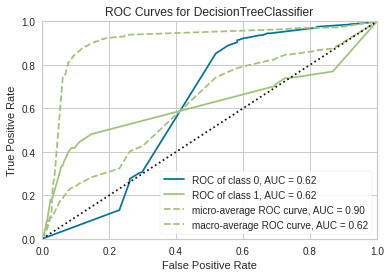

In [19]:
plot_model(optimizar_dt, plot = 'auc')

CURVA ROC existe un 62% de probabilidad de la que la predicción sea correcta, es un valor bastante mediocre desde mi punto de vista.


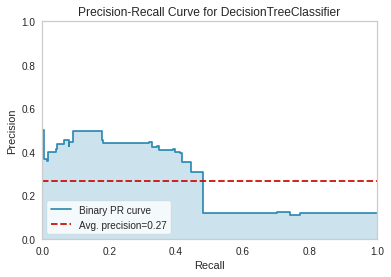

In [20]:
plot_model(optimizar_dt, plot = 'pr')

CURVA PR El valor de precision promedio 0.27 indica que este modelo de árbol de decisión no el mejor clasificador para este dataset, ya que no estaría optimizando el valor de precisión y recall.

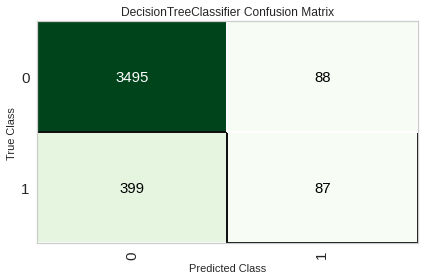

In [21]:
plot_model(optimizar_dt, plot = 'confusion_matrix')

In [22]:
evaluate_model(optimizar_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# CALIBRAMOS EL MODELO

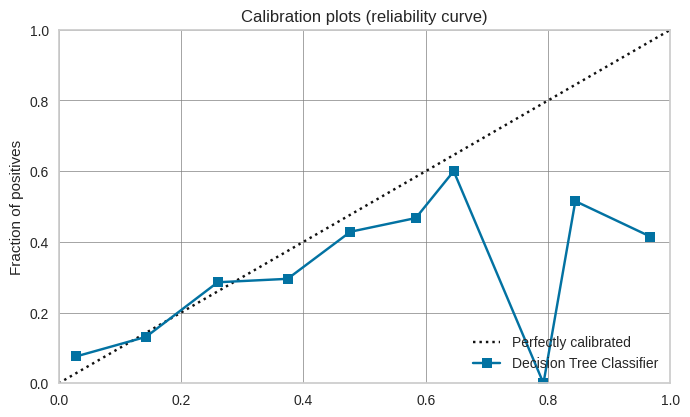

In [23]:
plot_model(optimizar_dt, plot='calibration')

In [24]:
calibrated_dt = calibrate_model(dt, fold = 5, round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.89,0.65,0.33,0.60,0.42,0.37,0.39
1,0.89,0.65,0.25,0.62,0.35,0.30,0.34
2,0.89,0.64,0.39,0.57,0.46,0.40,0.41
3,0.89,0.67,0.30,0.59,0.39,0.34,0.37
4,0.89,0.65,0.27,0.57,0.37,0.32,0.35
Mean,0.89,0.65,0.31,0.59,0.40,0.35,0.37
Std,0.00,0.01,0.05,0.02,0.04,0.04,0.03


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

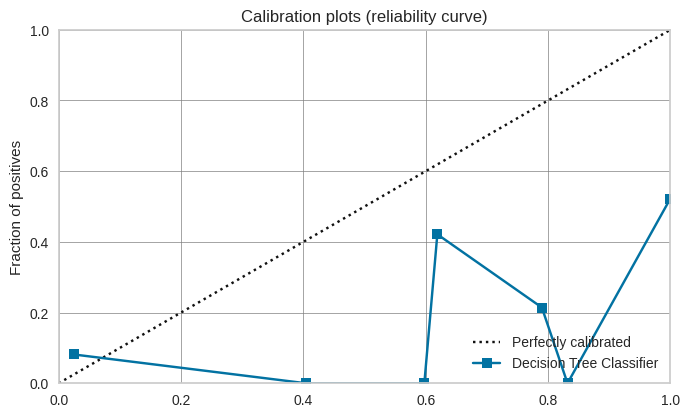

In [25]:
plot_model(calibrated_dt, plot='calibration')

Calibrar el modelo lo descalibra claramente

# PREDICCION DEL MODELO

In [26]:
predict_model(optimizar_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8803,0.6184,0,0,0,0.2135,0.2469


,edad,trabajo,estadoCivil_married,estadoCivil_single,estadoCivil_divorced,nivelEducativo_primary,nivelEducativo_secondary,nivelEducativo_constant,nivelEducativo_tertiary,mes,duracion,deposito,prediction_label,prediction_score
9494,28.0,0.276243,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.068237,85.0,no,no,1.0000
9495,27.0,0.081317,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.068237,531.0,no,no,0.9854
9496,35.0,0.131434,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.068237,160.0,no,no,0.9615
9497,45.0,0.081317,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.098910,702.0,no,no,0.5484
9498,34.0,0.128881,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.104718,114.0,yes,no,0.9615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,39.0,0.131434,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.188333,64.0,no,no,0.9615
13559,31.0,0.081317,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.068237,134.0,no,no,0.9615
13560,36.0,0.128881,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.068237,146.0,no,no,0.9615
13561,81.0,0.224066,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.098910,163.0,no,no,1.0000


# FINALIZACION DEL MODELO

In [27]:
final_dt = finalize_model(optimizar_dt)
print(final_dt)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['edad', 'duracion'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose...
                 TransformerWrapper(exclude=[], include=None,
                                    transformer=VarianceThreshold(threshold=0))),
                ('actual_estimator',

# **Generación del segundo modelo de clasificación**

In [28]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"
archivo="bank-full.csv"
clasificacion2 = pd.read_csv(url+archivo)

SEGUNDO MODELO LO VOY A ELABORAR CON SCIKIT LEARN (MASOQUISTA)

EL MODELO QUE VOY A TRATAR DE DESARROLLAR ES RANDOM FOREST

In [29]:
import sklearn #para los algoritmos de aprendizaje automático
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics #para la medición de los algoritmos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [30]:
import matplotlib.pyplot as plt #librería gráfica básica

In [31]:
clasificacion2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [32]:
clasificacion2.drop_duplicates(inplace=True)
clasificacion2.shape #dropeo duplicados en el caso de que los haya

(45211, 17)

In [33]:
clasificacion2 = clasificacion2.drop(columns=["default","balance","housing","loan","contact","day","campaign","pdays","previous", "poutcome"]) 
clasificacion2 #dropeo las columnas inncesarias para la modelización

,age,job,marital,education,month,duration,y
0,58,management,married,tertiary,may,261,no
1,44,technician,single,secondary,may,151,no
2,33,entrepreneur,married,secondary,may,76,no
3,47,blue-collar,married,NaN,may,92,no
4,33,NaN,single,NaN,may,198,no
...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,nov,977,yes
45207,71,retired,divorced,primary,nov,456,yes
45208,72,retired,married,secondary,nov,1127,yes
45209,57,blue-collar,married,secondary,nov,508,no


In [34]:
clasificacion2.rename(columns={"age":"edad",                      
                      "job":"trabajo",
                      "marital":"estadoCivil",
                      "education":"nivelEducativo",
                      "month":"mes",
                      "duration":"duracion",
                      "y":"deposito"}, inplace= True)

In [35]:
clasificacion2

,edad,trabajo,estadoCivil,nivelEducativo,mes,duracion,deposito
0,58,management,married,tertiary,may,261,no
1,44,technician,single,secondary,may,151,no
2,33,entrepreneur,married,secondary,may,76,no
3,47,blue-collar,married,NaN,may,92,no
4,33,NaN,single,NaN,may,198,no
...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,nov,977,yes
45207,71,retired,divorced,primary,nov,456,yes
45208,72,retired,married,secondary,nov,1127,yes
45209,57,blue-collar,married,secondary,nov,508,no


In [36]:
clasificacion2.replace({"unknown": None}, inplace=True) #adiós unknowns

In [37]:
clasificacion2.trabajo.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: trabajo, dtype: int64

In [38]:
clasificacion2.estadoCivil.value_counts()

married     27214
single      12790
divorced     5207
Name: estadoCivil, dtype: int64

In [39]:
clasificacion2.nivelEducativo.value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: nivelEducativo, dtype: int64

# Codificación del DF

In [43]:
clasificacion2 = pd.get_dummies(clasificacion2, columns=["trabajo","estadoCivil","nivelEducativo","mes"])

# División del DF

In [45]:
clasificacion2

,edad,duracion,deposito,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,trabajo_management,trabajo_retired,trabajo_self-employed,...,mes_dec,mes_feb,mes_jan,mes_jul,mes_jun,mes_mar,mes_may,mes_nov,mes_oct,mes_sep
0,58,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,151,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,76,no,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,92,no,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,198,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,977,yes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,456,yes,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,1127,yes,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,508,no,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# DIVISION DEL DATAFRAME

In [46]:
y = clasificacion2['deposito'] #se define la variable objetivo


In [47]:
X = clasificacion2.drop(columns=['deposito']) #se elimina la variable objetivo del vector de características

In [48]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: deposito, Length: 45211, dtype: object

In [49]:
X

,edad,duracion,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,trabajo_management,trabajo_retired,trabajo_self-employed,trabajo_services,...,mes_dec,mes_feb,mes_jan,mes_jul,mes_jun,mes_mar,mes_may,mes_nov,mes_oct,mes_sep
0,58,261,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,151,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,76,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,92,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,198,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,977,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,456,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,1127,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,508,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**La proporcion es 80% para entrenamiento y 20% para prueba**

In [51]:
X_train.shape

(36168, 31)

In [52]:
X_test.shape

(9043, 31)

In [53]:
y_train.shape

(36168,)

In [54]:
y_test.shape

(9043,)

# Creación del algoritmo

In [55]:
model_rf = RandomForestClassifier(n_estimators = 15, bootstrap = True, oob_score = True, random_state = 0) #Probamos con 15 árbolitos

In [56]:
model_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=15, n_jobs=None, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)

In [57]:
prediccion = model_rf.oob_decision_function_ 
prediccion #predicción del bosque, es el consenso de la predicción de los árboles que ponemos en el n_estimators

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       ...,
       [0.375, 0.625],
       [0.8  , 0.2  ],
       [1.   , 0.   ]])

In [59]:
prediccion.shape

(45211, 2)

In [60]:
model_rf.oob_score_ #muestreo fuera de la bolsa para medir la precisión

0.877950056402203

El número de predicciones correctas sobre la muestra fuera de la bolsa (oob). Accuracy del 87.7%

Con auto machine learning el accuracy me daba más alto.

# Ahora probamos con cross validation

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [62]:
model2_rf = RandomForestClassifier(n_estimators = 15, random_state = 0)
model2_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=15, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [63]:
prob = model2_rf.predict_proba(X_test)
prob

array([[1.        , 0.        ],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.53333333, 0.46666667],
       [1.        , 0.        ]])

In [64]:
prob.shape

(9043, 2)

In [65]:
y_pred_rf = model2_rf.predict(X_test)
y_pred_rf

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [66]:
compare = pd.DataFrame()
compare["Real"] = y_test
compare["Predicción"] = y_pred_rf
compare

,Real,Predicción
14001,no,no
32046,yes,no
13318,no,no
42991,no,no
14237,no,no
...,...,...
18448,yes,no
6654,no,no
17106,no,no
9025,yes,no


In [68]:
mc = metrics.confusion_matrix(y_test, y_pred_rf)
print(mc)

[[7557  423]
 [ 680  383]]


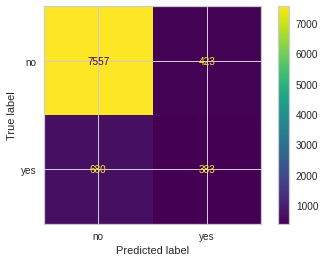

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=model2_rf.classes_)
disp.plot();

In [70]:
reporte = metrics.classification_report(y_test, y_pred_rf)
print(reporte)

              precision    recall  f1-score   support

          no       0.92      0.95      0.93      7980
         yes       0.48      0.36      0.41      1063

    accuracy                           0.88      9043
   macro avg       0.70      0.65      0.67      9043
weighted avg       0.87      0.88      0.87      9043



In [71]:
metrics.accuracy_score(y_test, y_pred_rf)

0.8780272033617162

Mejora muy poco el dato de accuracy el random forest con cross validation, respecto a sin validación cruzada.

Lo que si noto es una diferencia enorme en el recall de este modelo con el analizado en la primera parte, hay un bajo nivel de "falsos positivos".

A simple vista me parece un mejor modelo predictor el desarrollado en este segundo punto, algo que ya había visualizado cuándo desarrollamos la comparación de modelos, pero bueno como científico de datos en progreso necesito aprender por la experiencia. No todo es PyCaret.
